In [1]:

from utils.kalman import *
from utils.view_plot import *


# Orientation estimation using extended kalman filter
  Based on: X. Yun and E. R. Bachmann, ‘Design, Implementation, and Experimental Results of a Quaternion-Based Kalman Filter for Human Body Motion Tracking’, IEEE Trans. Robot., vol. 22, no. 6, pp. 1216–1227, Dec. 2006, doi: 10.1109/TRO.2006.886270.
  
The state vector contains 3D angular velocity and quaternion: 
$$
\vec{x} = \begin{pmatrix} \omega_x & \omega_y & \omega_z & q_1 & q_2 & q_3 & q_4 \end{pmatrix}^T
$$

1. define functions
2. import dataset
3. filter
4. visualise

### load data

In [2]:
df = pd.read_csv('../utils/servo_rotation_data_90/rotation_y.csv')
acc = np.array([
    df['Accel_X'], df['Accel_Y'], df['Accel_Z']
]).T
mag = np.array([
    df['Magneto_X'], df['Magneto_Y'], df['Magneto_Z']
]).T
gyr = np.array([
    df['Gyro_X'], df['Gyro_Y'], df['Gyro_Z']
]).T

q = np.array([
    df['Quaternion_W'], df['Quaternion_X'], df['Quaternion_Y'], df['Quaternion_Z'] 
]).T

assert acc.shape[1] == 3, "Wrong accelerometer data shape!"
assert mag.shape[1] == 3, "Wrong magnetometer data shape!"
assert gyr.shape[1] == 3, "Wrong gyroscope data shape!"

n = acc.shape[0]
print(f'We have {n} measurements.')
verify_data_structure(gyr, acc)

We have 762 measurements.
Data Structure Information:
Gyroscope data shape: (762, 3)
Accelerometer data shape: (762, 3)
Gyroscope data sample: [ 0.0625  0.25   -0.125 ]
Accelerometer data sample: [-0.28999999 -0.09        9.73999977]

Data Types:
Gyroscope data type: float64
Accelerometer data type: float64

Data Ranges:
Gyroscope range: [-233.875, 279.875]
Accelerometer range: [-6.480000019073486, 28.770000457763672]


## filter

In [3]:
ekf = QuaternionEKF()
n_samples = len(gyr)
predictions = np.zeros((n_samples, 4))

for i in range(n_samples):
    state = ekf.process_measurement(gyr[i], acc[i], mag[i], q[i])
    predictions[i] = state[3:7]

print(f'There are {predictions.shape[0]} predictions.')

There are 762 predictions.


## visualise

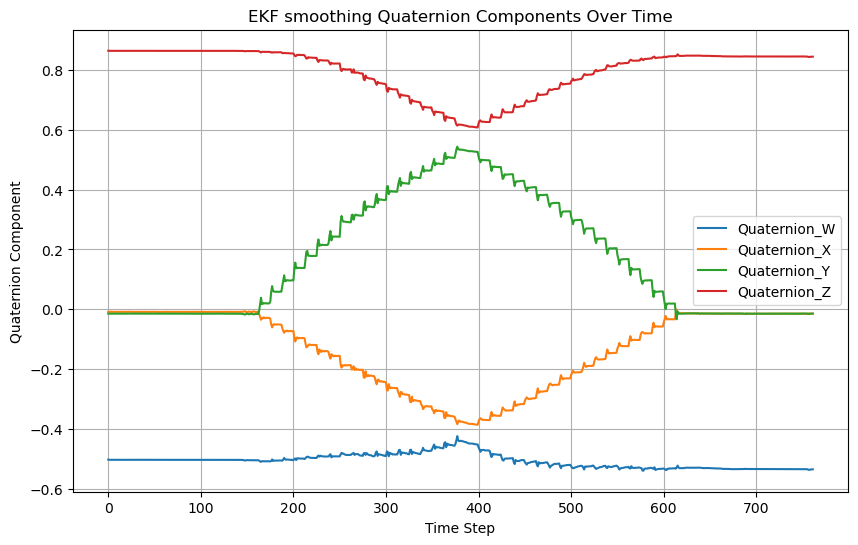

In [5]:
plot_predicted_quaternions(predictions, "EKF smoothing")

In [6]:
print(f'q size: {q.shape}')

predicted_roll= np.zeros((n_samples,1))
predicted_pitch = np.zeros((n_samples,1))
predicted_yaw = np.zeros((n_samples,1))
measured_roll = np.zeros((n_samples,1))
measured_pitch = np.zeros((n_samples,1))
measured_yaw = np.zeros((n_samples,1))

for i in range(n_samples):
    m_roll, m_pitch, m_yaw = quaternion_to_euler_angles(q[i])
    measured_roll[i] = m_roll
    measured_pitch[i] = m_pitch
    measured_yaw[i] = m_yaw
    p_roll, p_pitch, p_yaw = quaternion_to_euler_angles(predictions[i])
    predicted_roll[i] = p_roll
    predicted_pitch[i] = p_pitch
    predicted_yaw[i] = p_yaw

assert measured_roll.shape[0] == n_samples, "Wrong measured_roll data shape"
assert measured_pitch.shape[0] == n_samples, "Wrong measured_pitch data shape"
assert measured_yaw.shape[0] == n_samples, "Wrong measured_yaw data shape"


q size: (762, 4)


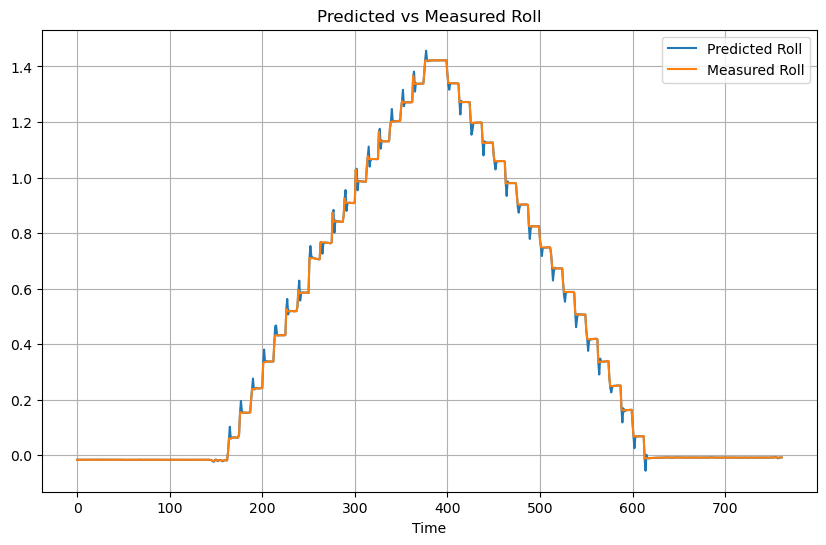

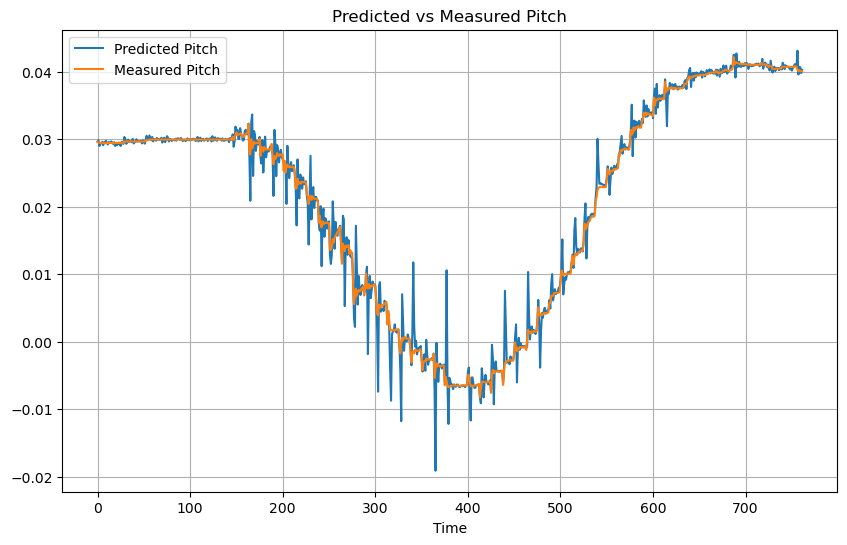

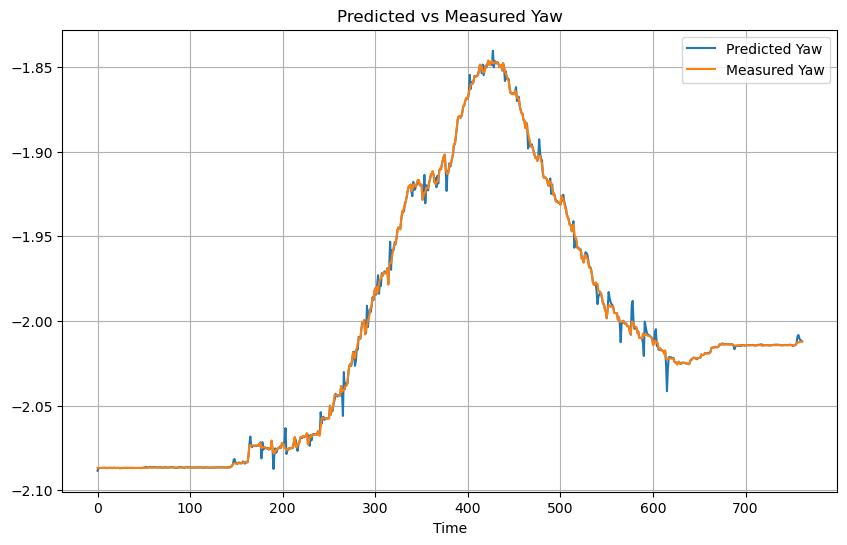

In [8]:
plot_roll(predicted_roll, measured_roll)
plot_pitch(predicted_pitch, measured_pitch)
plot_yaw(predicted_yaw, measured_yaw)